# Entry 26b notebook - Setting thresholds - PR and ROC - openml.org Breast Cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.datasets import load_digits, fetch_openml

In [2]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')
    plt.grid()
    plt.ylim([0, 1])
    
def plot_precision_vs_recall(precisions, recalls, thresholds):
    close_default = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(precisions[close_default], recalls[close_default], 'o', markersize=10,
            label='threshold zero', fillstyle="none", c='k', mew=2)
    plt.plot(recalls, precisions, "b-", linewidth=2, label='precision recall curve')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.legend(loc='best')
    plt.grid(True)
    
def plt_roc_curve(fpr, tpr, thresholds, label='ROC curve'):
    close_default = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(fpr[close_default], tpr[close_default], 'o', markersize=10,
            label='default threshold 0.5', fillstyle="none", c='k', mew=2)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## Make dataset and fit model

In [3]:
cancer = fetch_openml('breast-w',as_frame=True)
df = cancer.data
target = cancer.target.astype('category').cat.codes

In [4]:
target.value_counts()

0    458
1    241
dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size=0.8, random_state=12)
pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LogisticRegression(solver='lbfgs'))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9785714285714285

In [6]:
cross_validate(pipe, X_train, y_train, cv=10, scoring=['precision', 'average_precision', 'recall',
                                                       'f1', 'neg_log_loss', 'neg_brier_score'])

{'fit_time': array([0.00842786, 0.00608182, 0.00739503, 0.00637197, 0.00704789,
        0.00769687, 0.00660706, 0.00651193, 0.00606918, 0.00777292]),
 'score_time': array([0.00810885, 0.008178  , 0.0070231 , 0.00655389, 0.0070889 ,
        0.00788403, 0.00603414, 0.00798893, 0.00709176, 0.00757623]),
 'test_precision': array([0.95      , 0.95      , 0.94736842, 1.        , 0.9       ,
        0.9375    , 0.88888889, 0.95      , 1.        , 0.95      ]),
 'test_average_precision': array([0.99459834, 1.        , 0.98290796, 1.        , 0.96242055,
        0.97397216, 0.98418414, 0.99459834, 1.        , 0.98528891]),
 'test_recall': array([1.        , 1.        , 0.94736842, 0.94736842, 0.94736842,
        0.78947368, 0.84210526, 1.        , 1.        , 1.        ]),
 'test_f1': array([0.97435897, 0.97435897, 0.94736842, 0.97297297, 0.92307692,
        0.85714286, 0.86486486, 0.97435897, 1.        , 0.97435897]),
 'test_neg_log_loss': array([-0.0701872 , -0.04552579, -0.14721249, -0.04527

### Precision vs Recall

In [7]:
y_scores =  cross_val_predict(pipe, X_train, y_train, cv=10, method='predict_proba')[:,1]

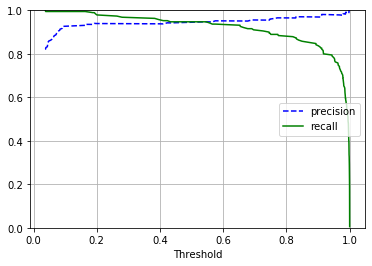

In [8]:
precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, pr_thresholds)

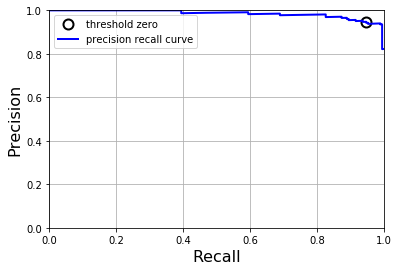

In [9]:
plot_precision_vs_recall(precisions, recalls, pr_thresholds)

In [10]:
auc(recalls, precisions)

0.9850124417645512

In [11]:
average_precision_score(y_train, y_scores)

0.9850624221476324

### ROC Curve and ROC AUC

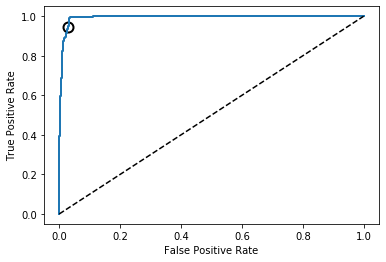

In [12]:
fpr, tpr, roc_thresholds = roc_curve(y_train, y_scores)
plt_roc_curve(fpr, tpr, roc_thresholds)

In [13]:
roc_auc_score(y_train, y_scores)

0.9934531450577664